   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

C:\Users\Baby\AppData\Local\Temp\ipykernel_13668\3860977095.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Baby\AppData\Local\Temp\ipykernel_13668\3860977095.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

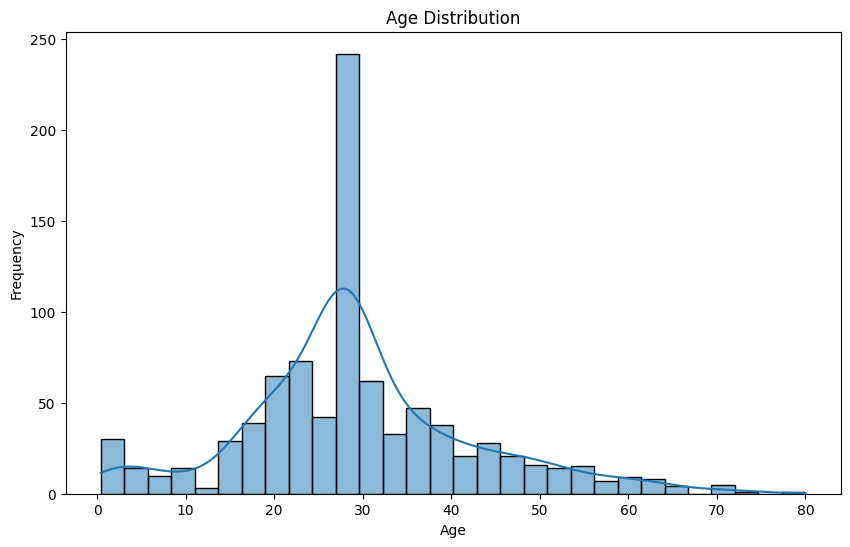

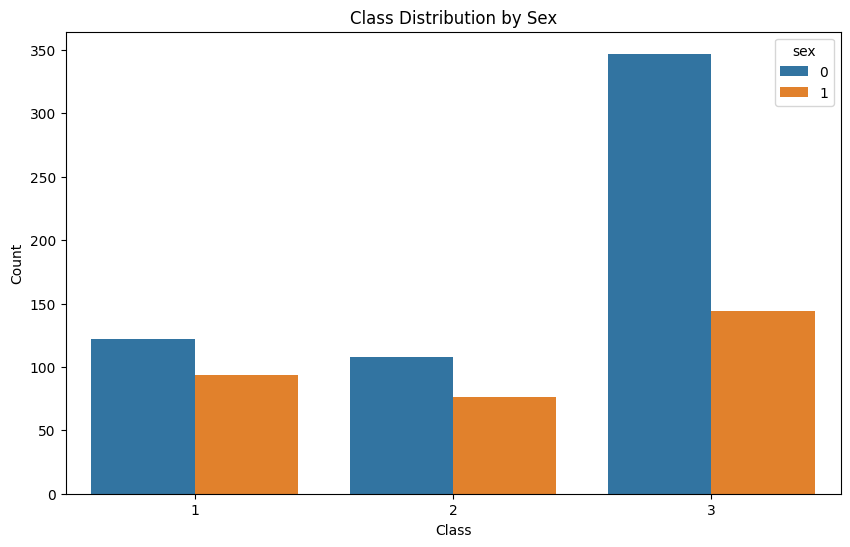

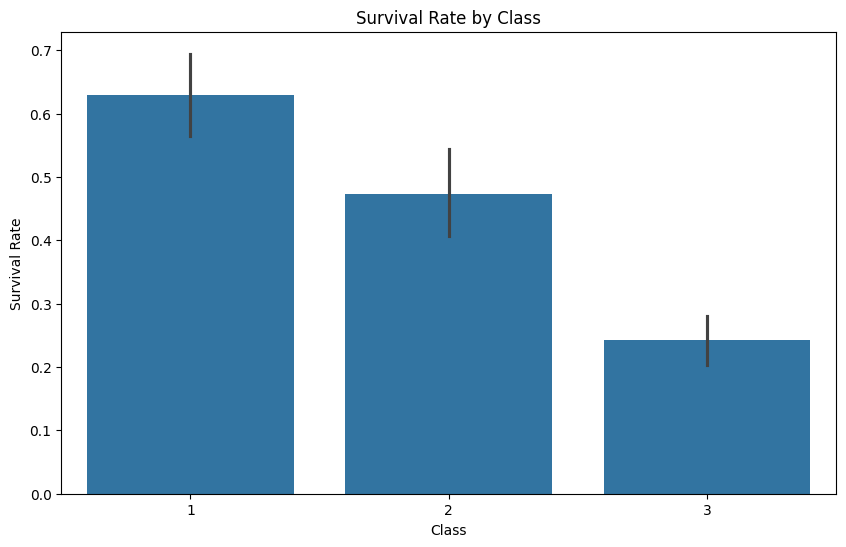

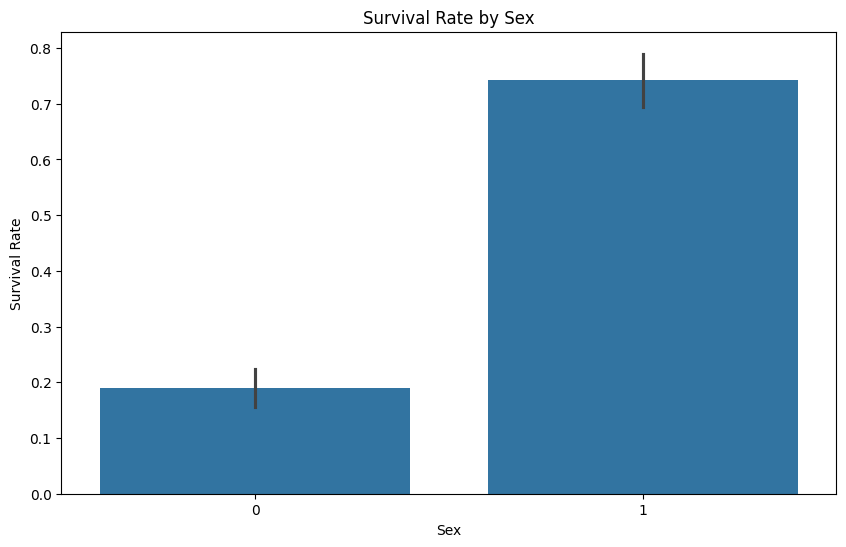

<Figure size 1200x800 with 0 Axes>

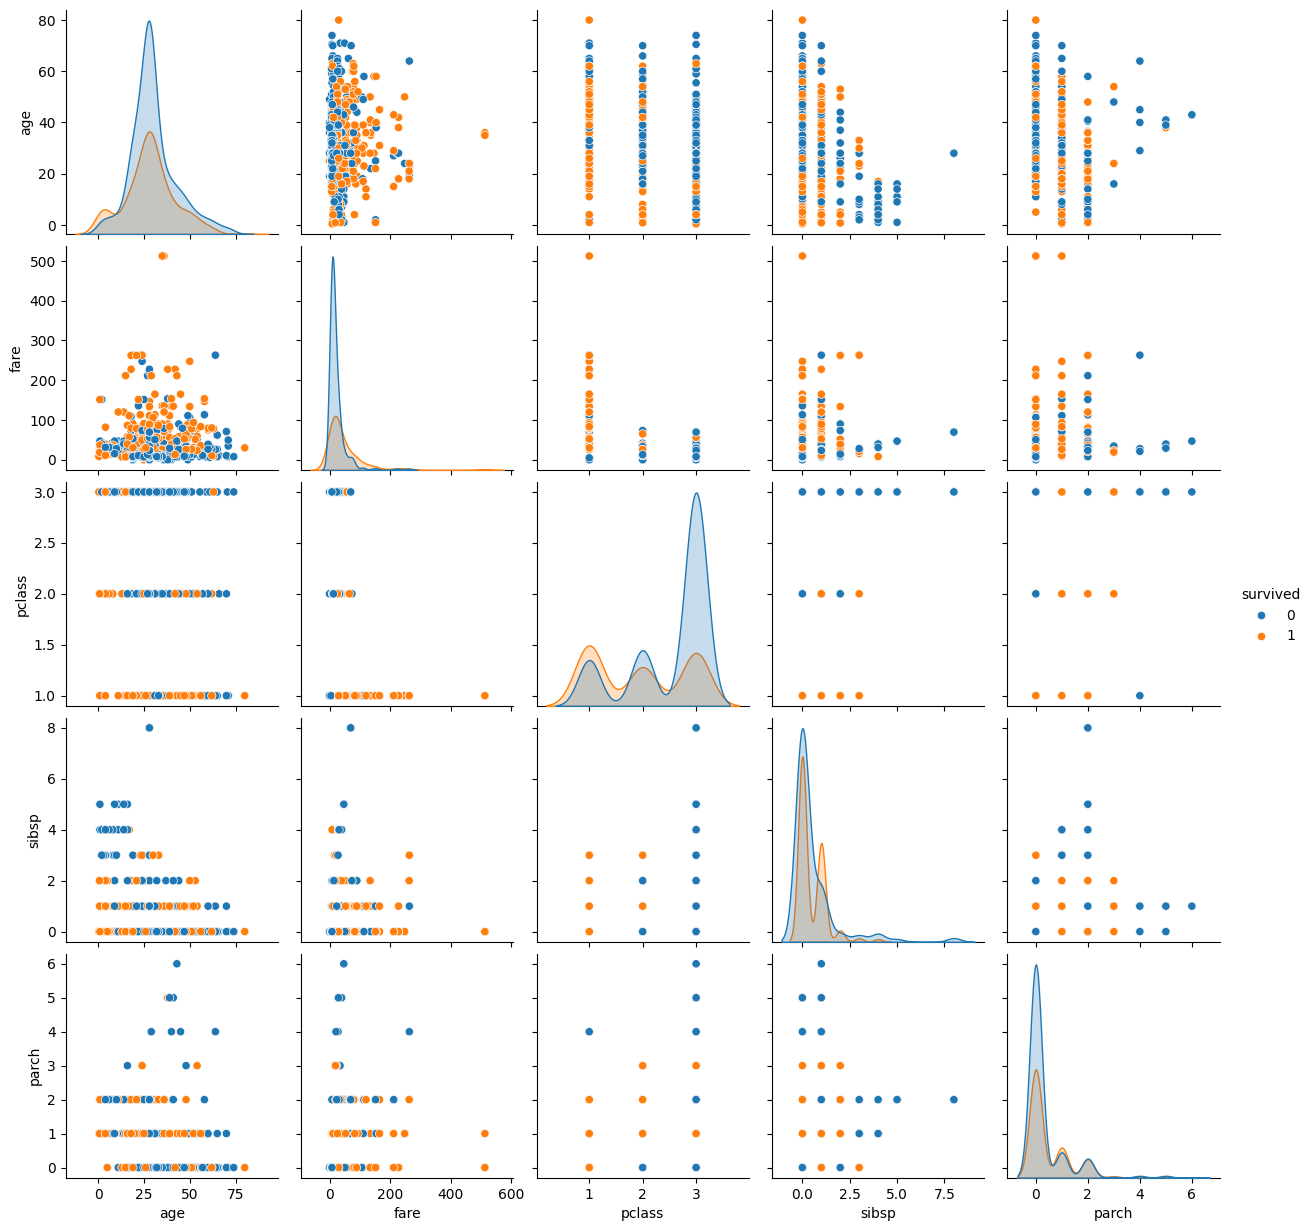

   survived  pclass  sex   age  sibsp  parch     fare  class  adult_male  \
0         0       3    0  22.0      1      0   7.2500  Third        True   
1         1       1    1  38.0      1      0  71.2833  First       False   
2         1       3    1  26.0      0      0   7.9250  Third       False   
3         1       1    1  35.0      1      0  53.1000  First       False   
4         0       3    0  35.0      0      0   8.0500  Third        True   

   alive  embarked_Q  embarked_S  who_man  who_woman  embark_town_Queenstown  \
0    NaN       False        True     True      False                   False   
1    NaN       False       False    False       True                   False   
2    NaN       False        True    False       True                   False   
3    NaN       False        True    False       True                   False   
4    NaN       False        True     True      False                   False   

   embark_town_Southampton  alone_True  family_size  
0       

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe(include='all'))

# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)  # Dropping 'deck' due to many missing values

# Verify missing values again
print(df.isnull().sum())

# Encoding categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked', 'who', 'embark_town', 'alone'], drop_first=True)

# Verify that no non-numeric columns remain
print(df.dtypes)

# Ensure all columns are numeric
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Verify data types again
print(df.dtypes)

# Univariate Analysis: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pclass', hue='sex')
plt.title('Class Distribution by Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis: Survival Rate by Class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Multivariate Analysis: Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df[['age', 'fare', 'survived', 'pclass', 'sibsp', 'parch']].dropna(), hue='survived')
plt.show()



# Feature Engineering: Create New Feature
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Display the first few rows to verify the new features
print(df.head())


In [30]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Handling missing values for simplicity
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'age' and 'fare' and get bounds
outliers_age, lower_bound_age, upper_bound_age = detect_outliers_iqr(df, 'age')
outliers_fare, lower_bound_fare, upper_bound_fare = detect_outliers_iqr(df, 'fare')

print("Outliers in 'age':")
print(outliers_age)
print("\nOutliers in 'fare':")
print(outliers_fare)

# Remove outliers from 'age' and 'fare'
df_no_outliers = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age) & 
                    (df['fare'] >= lower_bound_fare) & (df['fare'] <= upper_bound_fare)]

print("Dataset after removing outliers:")
print(df_no_outliers.head())


Outliers in 'age':
     survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
7           0       3    male   2.00      3      1  21.0750        S   Third   
11          1       1  female  58.00      0      0  26.5500        S   First   
15          1       2  female  55.00      0      0  16.0000        S  Second   
16          0       3    male   2.00      4      1  29.1250        Q   Third   
33          0       2    male  66.00      0      0  10.5000        S  Second   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
827         1       2    male   1.00      0      2  37.0042        C  Second   
829         1       1  female  62.00      0      0  80.0000      NaN   First   
831         1       2    male   0.83      1      1  18.7500        S  Second   
851         0       3    male  74.00      0      0   7.7750        S   Third   
879         1       1  female  56.00      0      1  83.1583        C   First   

       who  adult_ma

C:\Users\Baby\AppData\Local\Temp\ipykernel_13668\614088238.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Baby\AppData\Local\Temp\ipykernel_13668\614088238.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp